In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot_performance_energy(loads, performance, energy, methods, export_path=None):
    n_loads = len(loads)
    n_methods = len(methods)
    index = np.arange(n_loads)
    bar_width = 0.1
    
    # Texture filling
    hatches = ['////', '....', '||||', '----', '++++', 'xxxx']

    # Subplot arrangement
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

    # Barplot of performance(related)
    for i, method in enumerate(methods):
        ax1.bar(index + i * bar_width, performance[:, i], bar_width, label=method, hatch=hatches[i], color='white', edgecolor='black')

    ax1.set_ylabel('Related Performance (Higher is better)')
    ax1.set_title('Relative Performance and Energy Efficiency Comparison')
    ax1.tick_params(labelbottom=False)  # hide upper x label

    # Mirror barplot of energy efficiency(Related)
    for i, method in enumerate(methods):
        ax2.bar(index + i * bar_width, energy[:, i], bar_width, hatch=hatches[i], color='white', edgecolor='black')

    ax2.set_ylabel('Related Energy Efficiency(Higher is better)')
    ax2.set_xticks(index + bar_width * (n_methods - 1) / 2)
    ax2.set_xticklabels(loads)
    ax2.invert_yaxis()  # 反转y轴，使得较大的能耗在下方

    # 设置图例
    handles, labels = ax1.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=n_methods)

    # 调整子图间距和图例位置
    fig.subplots_adjust(hspace=0, bottom=0)

    # 如果提供了导出路径，则保存图像
    if export_path:
        plt.savefig(f"{export_path}/performance_energy_comparison.png", bbox_inches='tight')
    plt.show()


In [3]:
def plot_optimization_results(strategies, loads, vector_lengths, export_path=None):
    # strategies: 调度策略列表
    # loads: 负载列表
    # vector_lengths: 每种负载对应的优化结果向量的长度列表

    # 创建6行5列的子图
    fig, axs = plt.subplots(len(strategies), len(loads), figsize=(20, 15))

    # 随机颜色列表，对应三种算法
    colors = ['blue', 'green', 'red']

    for i, strategy in enumerate(strategies):
        for j, load in enumerate(loads):
            # 生成等长的优化结果向量
            vector_length = vector_lengths[j]
            best_result = np.random.rand(vector_length)
            color = np.random.choice(colors)

            # 绘制条形图
            axs[i, j].bar(range(vector_length), best_result, color=color)
            axs[i, j].set_ylim(0, 1)  # 优化结果在0-1之间
            axs[i, j].set_title(f'{strategy} - {load}')
            axs[i, j].set_xticks([])  # 隐藏x轴刻度

    # 添加外部的y轴和x轴标签
    fig.text(0.04, 0.5, 'Optimization Results', va='center', rotation='vertical', fontsize=12)
    fig.text(0.5, 0.04, 'Vector Elements', ha='center', fontsize=12)

    # 调整布局
    plt.tight_layout()

    # 如果提供了导出路径，则保存图像
    if export_path:
        plt.savefig(f"{export_path}/optimization_results.png", bbox_inches='tight')
    plt.show()

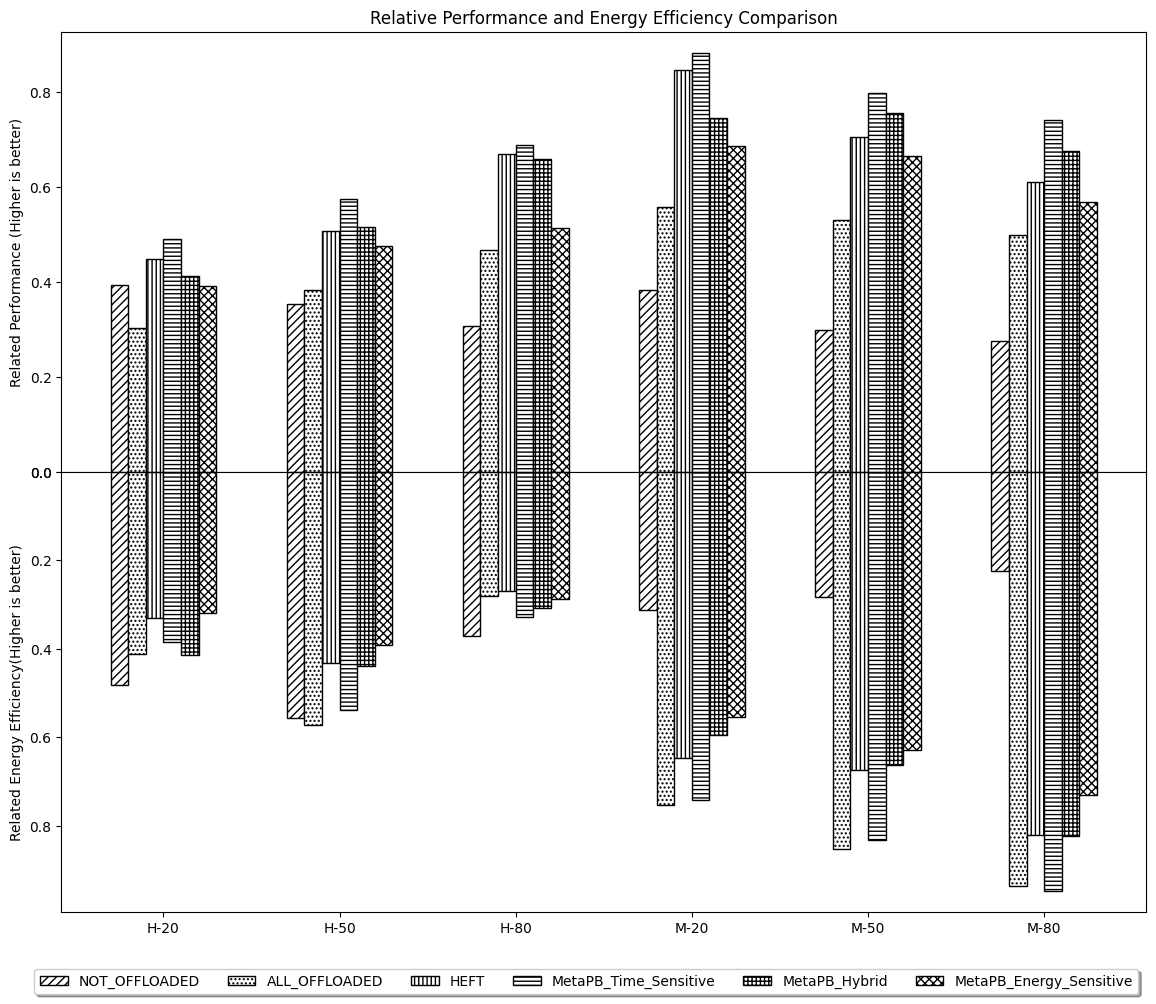

In [4]:
loads = ['H-20', 'H-50', 'H-80', 'M-20', 'M-50', 'M-80']
strategies = ['NOT_OFFLOADED', 'ALL_OFFLOADED', 'HEFT', 'MetaPB_Time_Sensitive','MetaPB_Hybrid' , 'MetaPB_Energy_Sensitive']
performance = np.genfromtxt('Time_Strategy_Mat.csv', delimiter=',')
energy = np.genfromtxt('Energy_Strategy_Mat.csv', delimiter=',')
plot_performance_energy(loads, performance, energy, strategies, export_path='.')
#plot_optimization_results(strategies, loads, vector_lengths, export_path='.')

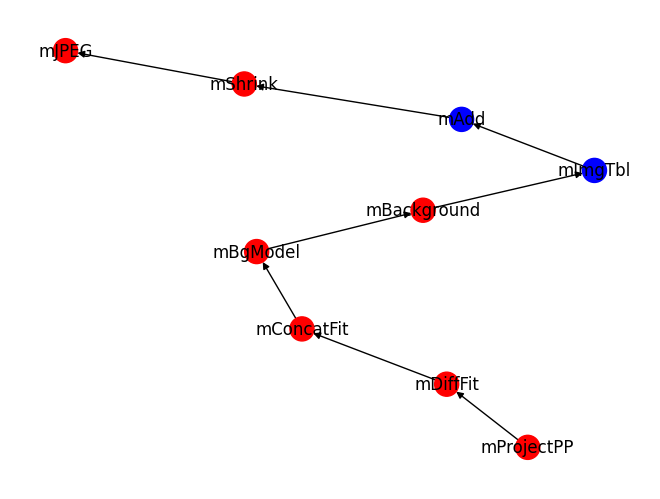

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# 创建一个新的图对象
G = nx.DiGraph()

# 添加节点和边，这里需要根据Montage计算图的结构来定义
# 例如，这里我们添加了一些示例节点和边
nodes = ['mProjectPP', 'mDiffFit', 'mConcatFit', 'mBgModel', 'mBackground', 'mImgTbl', 'mAdd', 'mShrink', 'mJPEG']
edges = [('mProjectPP', 'mDiffFit'), ('mDiffFit', 'mConcatFit'), ('mConcatFit', 'mBgModel'), 
         ('mBgModel', 'mBackground'), ('mBackground', 'mImgTbl'), ('mImgTbl', 'mAdd'), 
         ('mAdd', 'mShrink'), ('mShrink', 'mJPEG')]

# 向图中添加节点和边
G.add_nodes_from(nodes)
G.add_edges_from(edges)

# 为每个节点分配一个随机颜色
color_map = []
for node in G:
    color_map.append('blue' if random.random() < 0.5 else 'red')

# 绘制图
pos = nx.spring_layout(G)  # 为图形布局
nx.draw(G, pos, node_color=color_map, with_labels=True, arrows=True)

# 显示图
plt.show()